<a href="https://colab.research.google.com/github/abidshafee/DataScienceYouTubeTutorials/blob/master/breastCancer_ClassificationModel(KerasSequential).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import pandas.util.testing as tm
# for data splitting
from sklearn.model_selection import train_test_split
# keras api
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Import the data

In [2]:
from google.colab import files
file = files.upload()

Saving BreastCancer_data.csv to BreastCancer_data.csv


Load the data into pandas dataframe

In [3]:
df = pd.read_csv('BreastCancer_data.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.shape

(569, 33)

### Cleaning Data

In [5]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Check the null column

In [7]:
df[df['Unnamed: 32'].isnull()]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Drop the null column

In [8]:
df.dropna(axis=1, inplace=True)

In [9]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
df.shape

(569, 32)

Converting the categorical diagnosis column to numerical values
because this is our target variable

In [11]:
df['diagnosis'] = np.where(df['diagnosis']=='M', 1, 0)

In [12]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Defining input variables X

In [13]:
X = df.iloc[:,2:]

In [14]:
X.shape

(569, 30)

Defining the target variable Y

In [15]:
Y = df.iloc[:, 1:2]

In [16]:
Y.shape

(569, 1)

Spliting data into train and test dataset

In [17]:
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=44)

Difining ann Sequencial model for tumar classification 

In [18]:
Classification_Model = Sequential()

### Arguments of Dense Layer

units -	Positive integer, dimensionality of the output space.

activation -	Activation function to use. If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).

use_bias -	Boolean, whether the layer uses a bias vector.

kernel_initializer -	Initializer for the kernel weights matrix.

bias_initializer	- Initializer for the bias vector.

kernel_regularizer - 	Regularizer function applied to the kernel weights matrix.

bias_regularizer	- Regularizer function applied to the bias vector.

activity_regularizer	- Regularizer function applied to the output of the layer (its "activation").

kernel_constraint	- Constraint function applied to the kernel weights matrix.

bias_constraint	- Constraint function applied to the bias vector

In [19]:
Classification_Model.add(Dense(units= 16, activation = 'relu', input_dim=30)) 
# units indicates here the ooutput dimention of Dense layer
Classification_Model.add(Dense(units=8, activation='relu'))
Classification_Model.add(Dense(units=6, activation='relu'))
Classification_Model.add(Dense(units=1, activation='sigmoid'))

In [20]:
Classification_Model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
print(Classification_Model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                496       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 693
Trainable params: 693
Non-trainable params: 0
_________________________________________________________________
None


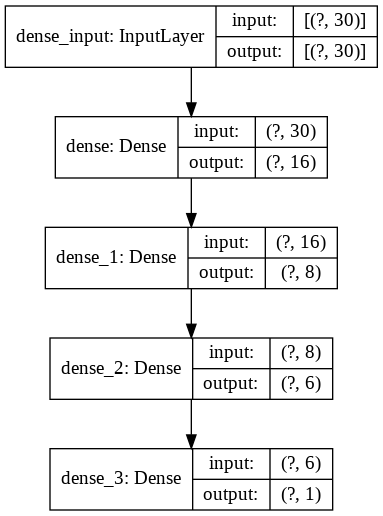

In [22]:
plot_model(Classification_Model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Train the Model with X_train, y_train dataset

**Batch:** a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model. A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).

**Epoch:** an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation. When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch. Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).


batch_size: Integer or `None`.  
        Number of samples per gradient update.  
        If unspecified, `batch_size` will default to 32.  
        Do not specify the `batch_size` if your data is in the  
        form of datasets, generators, or `keras.utils.Sequence` instances  
        (since they generate `batches`).  

In [23]:
Classification_Model.fit(X_train, y_train, batch_size=1, epochs=50)

Epoch 1/50
398/398 [==============================] - 0s 918us/step - loss: 4.5350 - accuracy: 0.6759
Epoch 2/50
398/398 [==============================] - 0s 910us/step - loss: 1.8372 - accuracy: 0.8417
Epoch 3/50
398/398 [==============================] - 0s 947us/step - loss: 2.1418 - accuracy: 0.8241
Epoch 4/50
398/398 [==============================] - 0s 902us/step - loss: 1.7037 - accuracy: 0.8342
Epoch 5/50
398/398 [==============================] - 0s 926us/step - loss: 1.8629 - accuracy: 0.8317
Epoch 6/50
398/398 [==============================] - 0s 914us/step - loss: 1.8316 - accuracy: 0.8367
Epoch 7/50
398/398 [==============================] - 0s 906us/step - loss: 1.6659 - accuracy: 0.8492
Epoch 8/50
398/398 [==============================] - 0s 873us/step - loss: 1.7655 - accuracy: 0.8593
Epoch 9/50
398/398 [==============================] - 0s 894us/step - loss: 1.7857 - accuracy: 0.8543
Epoch 10/50
398/398 [==============================] - 0s 932us/step - loss: 1.450

Lets quickly check our testing dataset

In [24]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
43,13.280,20.28,87.32,545.2,0.10410,0.14360,0.09847,0.061580,0.1974,0.06782,0.3704,0.8249,2.427,31.330,0.005072,0.021470,0.021850,0.009560,0.01719,0.003317,17.380,28.00,113.10,907.2,0.15300,0.37240,0.36640,0.14920,0.3739,0.10270
499,20.590,21.24,137.80,1320.0,0.10850,0.16440,0.21880,0.112100,0.1848,0.06222,0.5904,1.2160,4.206,75.090,0.006666,0.027910,0.040620,0.014790,0.01117,0.003727,23.860,30.76,163.20,1760.0,0.14640,0.35970,0.51790,0.21130,0.2480,0.08999
102,12.180,20.52,77.22,458.7,0.08013,0.04038,0.02383,0.017700,0.1739,0.05677,0.1924,1.5710,1.183,14.680,0.005080,0.006098,0.010690,0.006797,0.01447,0.001532,13.340,32.84,84.58,547.8,0.11230,0.08862,0.11450,0.07431,0.2694,0.06878
252,19.730,19.82,130.70,1206.0,0.10620,0.18490,0.24170,0.097400,0.1733,0.06697,0.7661,0.7800,4.115,92.810,0.008482,0.050570,0.068000,0.019710,0.01467,0.007259,25.280,25.59,159.80,1933.0,0.17100,0.59550,0.84890,0.25070,0.2749,0.12970
542,14.740,25.42,94.70,668.6,0.08275,0.07214,0.04105,0.030270,0.1840,0.05680,0.3031,1.3850,2.177,27.410,0.004775,0.011720,0.019470,0.012690,0.01870,0.002626,16.510,32.29,107.40,826.4,0.10600,0.13760,0.16110,0.10950,0.2722,0.06956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,14.780,23.94,97.40,668.3,0.11720,0.14790,0.12670,0.090290,0.1953,0.06654,0.3577,1.2810,2.450,35.240,0.006703,0.023100,0.023150,0.011840,0.01900,0.003224,17.310,33.39,114.60,925.1,0.16480,0.34160,0.30240,0.16140,0.3321,0.08911
387,13.880,16.16,88.37,596.6,0.07026,0.04831,0.02045,0.008507,0.1607,0.05474,0.2541,0.6218,1.709,23.120,0.003728,0.014150,0.019880,0.007016,0.01647,0.001970,15.510,19.97,99.66,745.3,0.08484,0.12330,0.10910,0.04537,0.2542,0.06623
241,12.420,15.04,78.61,476.5,0.07926,0.03393,0.01053,0.011080,0.1546,0.05754,0.1153,0.6745,0.757,9.006,0.003265,0.004930,0.006493,0.003762,0.01720,0.001360,13.200,20.37,83.85,543.4,0.10370,0.07776,0.06243,0.04052,0.2901,0.06783
175,8.671,14.45,54.42,227.2,0.09138,0.04276,0.00000,0.000000,0.1722,0.06724,0.2204,0.7873,1.435,11.360,0.009172,0.008007,0.000000,0.000000,0.02711,0.003399,9.262,17.04,58.36,259.2,0.11620,0.07057,0.00000,0.00000,0.2592,0.07848


### Now let's predict the target variable on test data Using our Sequential Model

In [ ]:
prediction = Classification_Model.predict(X_test)
prediction = [1 if y>0.5 else 0 for y in prediction] #list
prediction

In [26]:
len(prediction)

171

In [27]:
type(prediction)

list

In [28]:
type(y_test)

pandas.core.frame.DataFrame

COnverting Prediction list to pandas dataframe

In [29]:
pred = pd.DataFrame(prediction)

In [30]:
type(pred)

pandas.core.frame.DataFrame

### Now converting both pred dataframe and y_test dataframe to numpy ndarray to calculate prediction Accuracy

In [31]:
pred = pred.values

In [32]:
y_test_ndarray = y_test.values

### Prediction Accurecy

In [33]:
total = 0
correct = 0
wrong =0

for i in range(len(pred)):
    total = total+1
    if(y_test_ndarray[i]== pred[i]):
      correct = correct+1
    else:
       wrong = wrong+1
print('Total = ' + str(total))
print('Correct = ' + str(correct) + ' - Parcentage correct: ' + str(round((correct/total)*100, 2))+'%')
print('Wrong = ' + str(wrong) + ' Parcentage wrong: ' + str(round((wrong/total)*100, 2)) + '%')

Total = 171
Correct = 165 - Parcentage correct: 96.49%
Wrong = 6 Parcentage wrong: 3.51%


### Testing the model for individual input data

In [50]:
len(X_test)

171

In [56]:
input1 = X_test.iloc[[49]]
input1

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
87,19.02,24.59,122.0,1076.0,0.09029,0.1206,0.1468,0.08271,0.1953,0.05629,0.5495,0.6636,3.055,57.65,0.003872,0.01842,0.0371,0.012,0.01964,0.003337,24.56,30.41,152.9,1623.0,0.1249,0.3206,0.5755,0.1956,0.3956,0.09288


This individual iput has 30 attributes and 1 row

In [57]:
input1.shape

(1, 30)

Predict individual input data

In [58]:
prediction1 = Classification_Model.predict(input1)
prediction1

array([[1.]], dtype=float32)

In [59]:
prediction1 = ['1' if prediction1>0.5 else '0' for y in prediction1]
prediction1

['1']

### Manually checking Prediction Accuracy

In [60]:
df.loc[(df['area_mean']==1076.0	) & (df['concavity_mean']==0.1468)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
87,86135502,1,19.02,24.59,122.0,1076.0,0.09029,0.1206,0.1468,0.08271,0.1953,0.05629,0.5495,0.6636,3.055,57.65,0.003872,0.01842,0.0371,0.012,0.01964,0.003337,24.56,30.41,152.9,1623.0,0.1249,0.3206,0.5755,0.1956,0.3956,0.09288


As We can See that our Model predict the individual input accurately.